In [16]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: AMZN
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


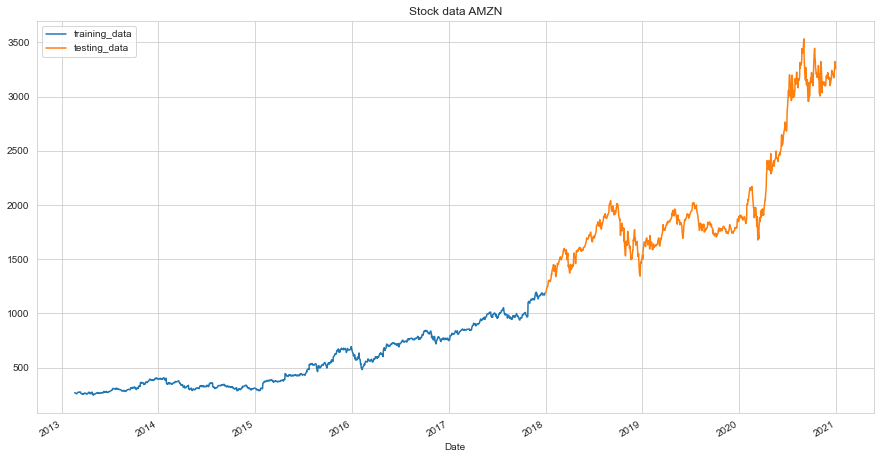

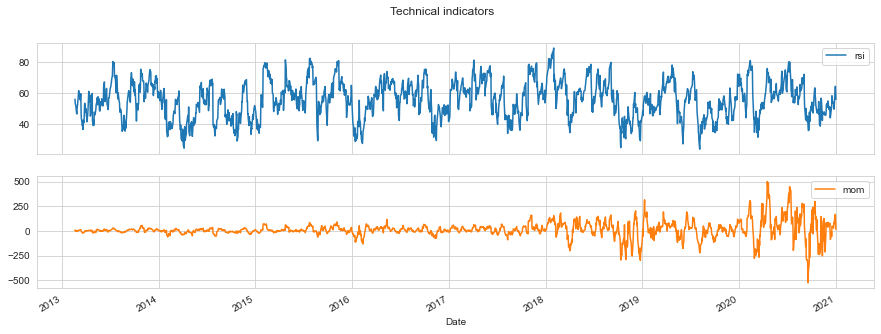

In [17]:
stock_name = 'amzn'.upper()
industry = 'Consumer cyclical'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [4]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1690.57, duration: 0:00:00.229053
episode: 2/2000, episode end value: 1680.61, duration: 0:00:00.227049
episode: 3/2000, episode end value: 1687.76, duration: 0:00:00.250055
episode: 4/2000, episode end value: 1688.37, duration: 0:00:00.256059
episode: 5/2000, episode end value: 1687.63, duration: 0:00:00.238051
episode: 6/2000, episode end value: 1687.81, duration: 0:00:00.248056
episode: 7/2000, episode end value: 1687.41, duration: 0:00:00.264057
episode: 8/2000, episode end value: 1687.55, duration: 0:00:00.245056
episode: 9/2000, episode end value: 1689.52, duration: 0:00:00.234052
episode: 10/2000, episode end value: 1698.31, duration: 0:00:00.213047
episode: 11/2000, episode end value: 1699.15, duration: 0:00:00.224067
episode: 12/2000, episode end value: 1703.79, duration: 0:00:00.217047
episode: 13/2000, episode end value: 1700.87, duration: 0:00:00.199057
episode: 14/2000, episode end value: 1705.00, duration: 0:00:00.194043
episode: 15/200

episode: 117/2000, episode end value: 1707.17, duration: 0:00:00.184042
episode: 118/2000, episode end value: 1704.59, duration: 0:00:00.176041
episode: 119/2000, episode end value: 1699.99, duration: 0:00:00.174038
episode: 120/2000, episode end value: 1700.40, duration: 0:00:00.176040
episode: 121/2000, episode end value: 1702.55, duration: 0:00:00.184047
episode: 122/2000, episode end value: 1708.32, duration: 0:00:00.177049
episode: 123/2000, episode end value: 1702.83, duration: 0:00:00.179027
episode: 124/2000, episode end value: 1693.82, duration: 0:00:00.177038
episode: 125/2000, episode end value: 1685.32, duration: 0:00:00.176041
episode: 126/2000, episode end value: 1708.84, duration: 0:00:00.185041
episode: 127/2000, episode end value: 1701.11, duration: 0:00:00.180042
episode: 128/2000, episode end value: 1697.63, duration: 0:00:00.183038
episode: 129/2000, episode end value: 1700.25, duration: 0:00:00.181040
episode: 130/2000, episode end value: 1701.08, duration: 0:00:00

episode: 231/2000, episode end value: 1714.69, duration: 0:00:00.227033
episode: 232/2000, episode end value: 1753.33, duration: 0:00:00.189042
episode: 233/2000, episode end value: 1697.04, duration: 0:00:00.193046
episode: 234/2000, episode end value: 1699.71, duration: 0:00:00.196044
episode: 235/2000, episode end value: 1710.06, duration: 0:00:00.194043
episode: 236/2000, episode end value: 1702.99, duration: 0:00:00.200044
episode: 237/2000, episode end value: 1702.21, duration: 0:00:00.207047
episode: 238/2000, episode end value: 1692.47, duration: 0:00:00.191042
episode: 239/2000, episode end value: 1707.60, duration: 0:00:00.186045
episode: 240/2000, episode end value: 1707.65, duration: 0:00:00.197046
episode: 241/2000, episode end value: 1697.53, duration: 0:00:00.194041
episode: 242/2000, episode end value: 1700.52, duration: 0:00:00.212048
episode: 243/2000, episode end value: 1714.35, duration: 0:00:00.208050
episode: 244/2000, episode end value: 1706.04, duration: 0:00:00

episode: 345/2000, episode end value: 1718.57, duration: 0:00:00.222050
episode: 346/2000, episode end value: 1712.16, duration: 0:00:00.219047
episode: 347/2000, episode end value: 1705.03, duration: 0:00:00.230050
episode: 348/2000, episode end value: 1687.52, duration: 0:00:00.227054
episode: 349/2000, episode end value: 1699.93, duration: 0:00:00.210044
episode: 350/2000, episode end value: 1706.78, duration: 0:00:00.234054
episode: 351/2000, episode end value: 1706.24, duration: 0:00:00.238053
episode: 352/2000, episode end value: 1704.65, duration: 0:00:00.219044
episode: 353/2000, episode end value: 1709.11, duration: 0:00:00.225054
episode: 354/2000, episode end value: 1706.00, duration: 0:00:00.225051
episode: 355/2000, episode end value: 1710.26, duration: 0:00:00.218046
episode: 356/2000, episode end value: 1712.44, duration: 0:00:00.222049
episode: 357/2000, episode end value: 1721.79, duration: 0:00:00.218058
episode: 358/2000, episode end value: 1707.29, duration: 0:00:00

episode: 459/2000, episode end value: 1703.32, duration: 0:00:00.274063
episode: 460/2000, episode end value: 1702.30, duration: 0:00:00.312069
episode: 461/2000, episode end value: 1712.79, duration: 0:00:00.281066
episode: 462/2000, episode end value: 1726.21, duration: 0:00:00.322067
episode: 463/2000, episode end value: 1714.92, duration: 0:00:00.296066
episode: 464/2000, episode end value: 1694.57, duration: 0:00:00.325073
episode: 465/2000, episode end value: 1701.96, duration: 0:00:00.302069
episode: 466/2000, episode end value: 1705.15, duration: 0:00:00.316070
episode: 467/2000, episode end value: 1702.35, duration: 0:00:00.327072
episode: 468/2000, episode end value: 1708.73, duration: 0:00:00.321076
episode: 469/2000, episode end value: 1730.22, duration: 0:00:00.320068
episode: 470/2000, episode end value: 1712.40, duration: 0:00:00.319073
episode: 471/2000, episode end value: 1708.06, duration: 0:00:00.323071
episode: 472/2000, episode end value: 1718.27, duration: 0:00:00

episode: 573/2000, episode end value: 1715.83, duration: 0:00:00.340076
episode: 574/2000, episode end value: 1701.98, duration: 0:00:00.428098
episode: 575/2000, episode end value: 1719.69, duration: 0:00:00.365083
episode: 576/2000, episode end value: 1709.47, duration: 0:00:00.378081
episode: 577/2000, episode end value: 1704.45, duration: 0:00:00.338076
episode: 578/2000, episode end value: 1699.46, duration: 0:00:00.371083
episode: 579/2000, episode end value: 1701.71, duration: 0:00:00.387087
episode: 580/2000, episode end value: 1704.07, duration: 0:00:00.367088
episode: 581/2000, episode end value: 1708.94, duration: 0:00:00.406087
episode: 582/2000, episode end value: 1678.00, duration: 0:00:00.439097
episode: 583/2000, episode end value: 1704.32, duration: 0:00:00.401085
episode: 584/2000, episode end value: 1701.42, duration: 0:00:00.389091
episode: 585/2000, episode end value: 1704.38, duration: 0:00:00.339075
episode: 586/2000, episode end value: 1693.18, duration: 0:00:00

episode: 687/2000, episode end value: 1700.15, duration: 0:00:00.335069
episode: 688/2000, episode end value: 1682.31, duration: 0:00:00.328073
episode: 689/2000, episode end value: 1707.94, duration: 0:00:00.341075
episode: 690/2000, episode end value: 1710.19, duration: 0:00:00.342076
episode: 691/2000, episode end value: 1706.46, duration: 0:00:00.403092
episode: 692/2000, episode end value: 1698.66, duration: 0:00:00.359080
episode: 693/2000, episode end value: 1709.30, duration: 0:00:00.391087
episode: 694/2000, episode end value: 1712.54, duration: 0:00:00.368083
episode: 695/2000, episode end value: 1714.26, duration: 0:00:00.353079
episode: 696/2000, episode end value: 1709.23, duration: 0:00:00.339078
episode: 697/2000, episode end value: 1701.34, duration: 0:00:00.379086
episode: 698/2000, episode end value: 1709.55, duration: 0:00:00.426097
episode: 699/2000, episode end value: 1707.81, duration: 0:00:00.408093
episode: 700/2000, episode end value: 1702.86, duration: 0:00:00

episode: 801/2000, episode end value: 1698.24, duration: 0:00:00.367083
episode: 802/2000, episode end value: 1701.23, duration: 0:00:00.368082
episode: 803/2000, episode end value: 1699.39, duration: 0:00:00.410091
episode: 804/2000, episode end value: 1711.87, duration: 0:00:00.367082
episode: 805/2000, episode end value: 1704.47, duration: 0:00:00.330077
episode: 806/2000, episode end value: 1705.82, duration: 0:00:00.389089
episode: 807/2000, episode end value: 1705.90, duration: 0:00:00.351074
episode: 808/2000, episode end value: 1694.21, duration: 0:00:00.347079
episode: 809/2000, episode end value: 1686.81, duration: 0:00:00.353081
episode: 810/2000, episode end value: 1734.57, duration: 0:00:00.374085
episode: 811/2000, episode end value: 1696.39, duration: 0:00:00.355077
episode: 812/2000, episode end value: 1696.44, duration: 0:00:00.374081
episode: 813/2000, episode end value: 1719.41, duration: 0:00:00.344077
episode: 814/2000, episode end value: 1702.97, duration: 0:00:00

episode: 915/2000, episode end value: 1664.18, duration: 0:00:00.412094
episode: 916/2000, episode end value: 1664.16, duration: 0:00:00.435099
episode: 917/2000, episode end value: 1678.71, duration: 0:00:00.455105
episode: 918/2000, episode end value: 1664.16, duration: 0:00:00.428093
episode: 919/2000, episode end value: 1672.34, duration: 0:00:00.438100
episode: 920/2000, episode end value: 1673.93, duration: 0:00:00.412088
episode: 921/2000, episode end value: 1687.37, duration: 0:00:00.527120
episode: 922/2000, episode end value: 1673.62, duration: 0:00:00.487109
episode: 923/2000, episode end value: 1667.58, duration: 0:00:00.526119
episode: 924/2000, episode end value: 1672.95, duration: 0:00:00.475105
episode: 925/2000, episode end value: 1677.21, duration: 0:00:00.520119
episode: 926/2000, episode end value: 1679.38, duration: 0:00:00.467104
episode: 927/2000, episode end value: 1681.10, duration: 0:00:00.440096
episode: 928/2000, episode end value: 1675.79, duration: 0:00:00

episode: 1029/2000, episode end value: 1708.75, duration: 0:00:00.468105
episode: 1030/2000, episode end value: 1707.67, duration: 0:00:00.418097
episode: 1031/2000, episode end value: 1712.81, duration: 0:00:00.451107
episode: 1032/2000, episode end value: 1710.55, duration: 0:00:00.442097
episode: 1033/2000, episode end value: 1702.28, duration: 0:00:00.432096
episode: 1034/2000, episode end value: 1699.19, duration: 0:00:00.427096
episode: 1035/2000, episode end value: 1710.69, duration: 0:00:00.381087
episode: 1036/2000, episode end value: 1704.45, duration: 0:00:00.391086
episode: 1037/2000, episode end value: 1696.87, duration: 0:00:00.431098
episode: 1038/2000, episode end value: 1704.19, duration: 0:00:00.403090
episode: 1039/2000, episode end value: 1710.23, duration: 0:00:00.382090
episode: 1040/2000, episode end value: 1705.13, duration: 0:00:00.386081
episode: 1041/2000, episode end value: 1678.15, duration: 0:00:00.396090
episode: 1042/2000, episode end value: 1698.85, dur

episode: 1142/2000, episode end value: 1701.83, duration: 0:00:00.403092
episode: 1143/2000, episode end value: 1684.44, duration: 0:00:00.398089
episode: 1144/2000, episode end value: 1706.30, duration: 0:00:00.408092
episode: 1145/2000, episode end value: 1699.27, duration: 0:00:00.403090
episode: 1146/2000, episode end value: 1706.76, duration: 0:00:00.409091
episode: 1147/2000, episode end value: 1714.45, duration: 0:00:00.388089
episode: 1148/2000, episode end value: 1697.31, duration: 0:00:00.359079
episode: 1149/2000, episode end value: 1701.82, duration: 0:00:00.339079
episode: 1150/2000, episode end value: 1701.35, duration: 0:00:00.347075
episode: 1151/2000, episode end value: 1721.76, duration: 0:00:00.337074
episode: 1152/2000, episode end value: 1694.88, duration: 0:00:00.341078
episode: 1153/2000, episode end value: 1706.00, duration: 0:00:00.395089
episode: 1154/2000, episode end value: 1699.73, duration: 0:00:00.412092
episode: 1155/2000, episode end value: 1705.69, dur

episode: 1255/2000, episode end value: 1700.76, duration: 0:00:00.340073
episode: 1256/2000, episode end value: 1702.34, duration: 0:00:00.351078
episode: 1257/2000, episode end value: 1718.27, duration: 0:00:00.381088
episode: 1258/2000, episode end value: 1702.06, duration: 0:00:00.422094
episode: 1259/2000, episode end value: 1703.15, duration: 0:00:00.346078
episode: 1260/2000, episode end value: 1698.69, duration: 0:00:00.364087
episode: 1261/2000, episode end value: 1707.93, duration: 0:00:00.387090
episode: 1262/2000, episode end value: 1710.01, duration: 0:00:00.348077
episode: 1263/2000, episode end value: 1714.45, duration: 0:00:00.378078
episode: 1264/2000, episode end value: 1716.94, duration: 0:00:00.331076
episode: 1265/2000, episode end value: 1715.58, duration: 0:00:00.380089
episode: 1266/2000, episode end value: 1705.90, duration: 0:00:00.317070
episode: 1267/2000, episode end value: 1710.86, duration: 0:00:00.408089
episode: 1268/2000, episode end value: 1717.61, dur

episode: 1368/2000, episode end value: 1706.37, duration: 0:00:00.380086
episode: 1369/2000, episode end value: 1695.36, duration: 0:00:00.429096
episode: 1370/2000, episode end value: 1706.92, duration: 0:00:00.422099
episode: 1371/2000, episode end value: 1721.30, duration: 0:00:00.306064
episode: 1372/2000, episode end value: 1613.63, duration: 0:00:00.393094
episode: 1373/2000, episode end value: 1671.99, duration: 0:00:00.424101
episode: 1374/2000, episode end value: 1698.04, duration: 0:00:00.445096
episode: 1375/2000, episode end value: 1693.26, duration: 0:00:00.420095
episode: 1376/2000, episode end value: 1728.57, duration: 0:00:00.372081
episode: 1377/2000, episode end value: 1691.11, duration: 0:00:00.336075
episode: 1378/2000, episode end value: 1688.82, duration: 0:00:00.394093
episode: 1379/2000, episode end value: 1688.04, duration: 0:00:00.391085
episode: 1380/2000, episode end value: 1683.95, duration: 0:00:00.371085
episode: 1381/2000, episode end value: 1719.94, dur

episode: 1481/2000, episode end value: 1708.34, duration: 0:00:00.374084
episode: 1482/2000, episode end value: 1706.61, duration: 0:00:00.390088
episode: 1483/2000, episode end value: 1710.46, duration: 0:00:00.327073
episode: 1484/2000, episode end value: 1710.95, duration: 0:00:00.339076
episode: 1485/2000, episode end value: 1700.70, duration: 0:00:00.386092
episode: 1486/2000, episode end value: 1716.10, duration: 0:00:00.347073
episode: 1487/2000, episode end value: 1702.77, duration: 0:00:00.375083
episode: 1488/2000, episode end value: 1715.11, duration: 0:00:00.370082
episode: 1489/2000, episode end value: 1701.36, duration: 0:00:00.372082
episode: 1490/2000, episode end value: 1705.42, duration: 0:00:00.353079
episode: 1491/2000, episode end value: 1724.93, duration: 0:00:00.313075
episode: 1492/2000, episode end value: 1692.23, duration: 0:00:00.350080
episode: 1493/2000, episode end value: 1689.48, duration: 0:00:00.396089
episode: 1494/2000, episode end value: 1707.66, dur

episode: 1594/2000, episode end value: 1706.14, duration: 0:00:00.333075
episode: 1595/2000, episode end value: 1693.39, duration: 0:00:00.403091
episode: 1596/2000, episode end value: 1712.60, duration: 0:00:00.400090
episode: 1597/2000, episode end value: 1713.29, duration: 0:00:00.365082
episode: 1598/2000, episode end value: 1701.21, duration: 0:00:00.336077
episode: 1599/2000, episode end value: 1705.17, duration: 0:00:00.364079
episode: 1600/2000, episode end value: 1707.21, duration: 0:00:00.336073
episode: 1601/2000, episode end value: 1715.89, duration: 0:00:00.391089
episode: 1602/2000, episode end value: 1707.16, duration: 0:00:00.398090
episode: 1603/2000, episode end value: 1694.18, duration: 0:00:00.341077
episode: 1604/2000, episode end value: 1710.47, duration: 0:00:00.386092
episode: 1605/2000, episode end value: 1704.59, duration: 0:00:00.350077
episode: 1606/2000, episode end value: 1700.27, duration: 0:00:00.347077
episode: 1607/2000, episode end value: 1708.27, dur

episode: 1707/2000, episode end value: 1694.24, duration: 0:00:00.354079
episode: 1708/2000, episode end value: 1698.91, duration: 0:00:00.367084
episode: 1709/2000, episode end value: 1708.32, duration: 0:00:00.371084
episode: 1710/2000, episode end value: 1701.17, duration: 0:00:00.432097
episode: 1711/2000, episode end value: 1723.32, duration: 0:00:00.419099
episode: 1712/2000, episode end value: 1697.96, duration: 0:00:00.417089
episode: 1713/2000, episode end value: 1704.23, duration: 0:00:00.365080
episode: 1714/2000, episode end value: 1718.86, duration: 0:00:00.394093
episode: 1715/2000, episode end value: 1708.51, duration: 0:00:00.420090
episode: 1716/2000, episode end value: 1721.43, duration: 0:00:00.369082
episode: 1717/2000, episode end value: 1697.68, duration: 0:00:00.328074
episode: 1718/2000, episode end value: 1691.14, duration: 0:00:00.368083
episode: 1719/2000, episode end value: 1721.50, duration: 0:00:00.414093
episode: 1720/2000, episode end value: 1685.47, dur

episode: 1820/2000, episode end value: 1699.58, duration: 0:00:00.393093
episode: 1821/2000, episode end value: 1714.21, duration: 0:00:00.366079
episode: 1822/2000, episode end value: 1704.67, duration: 0:00:00.386085
episode: 1823/2000, episode end value: 1730.44, duration: 0:00:00.371084
episode: 1824/2000, episode end value: 1709.84, duration: 0:00:00.332075
episode: 1825/2000, episode end value: 1683.69, duration: 0:00:00.389088
episode: 1826/2000, episode end value: 1696.32, duration: 0:00:00.498111
episode: 1827/2000, episode end value: 1678.70, duration: 0:00:00.363083
episode: 1828/2000, episode end value: 1657.49, duration: 0:00:00.489109
episode: 1829/2000, episode end value: 1680.93, duration: 0:00:00.425098
episode: 1830/2000, episode end value: 1673.11, duration: 0:00:00.509114
episode: 1831/2000, episode end value: 1660.03, duration: 0:00:00.470106
episode: 1832/2000, episode end value: 1653.14, duration: 0:00:00.401093
episode: 1833/2000, episode end value: 1664.07, dur

episode: 1933/2000, episode end value: 1690.89, duration: 0:00:00.397092
episode: 1934/2000, episode end value: 1698.23, duration: 0:00:00.353078
episode: 1935/2000, episode end value: 1730.99, duration: 0:00:00.394087
episode: 1936/2000, episode end value: 1683.67, duration: 0:00:00.323071
episode: 1937/2000, episode end value: 1706.93, duration: 0:00:00.331078
episode: 1938/2000, episode end value: 1696.81, duration: 0:00:00.407087
episode: 1939/2000, episode end value: 1697.85, duration: 0:00:00.361078
episode: 1940/2000, episode end value: 1695.61, duration: 0:00:00.335076
episode: 1941/2000, episode end value: 1694.30, duration: 0:00:00.361086
episode: 1942/2000, episode end value: 1695.15, duration: 0:00:00.369082
episode: 1943/2000, episode end value: 1688.47, duration: 0:00:00.367079
episode: 1944/2000, episode end value: 1751.35, duration: 0:00:00.325071
episode: 1945/2000, episode end value: 1676.46, duration: 0:00:00.368087
episode: 1946/2000, episode end value: 1686.64, dur

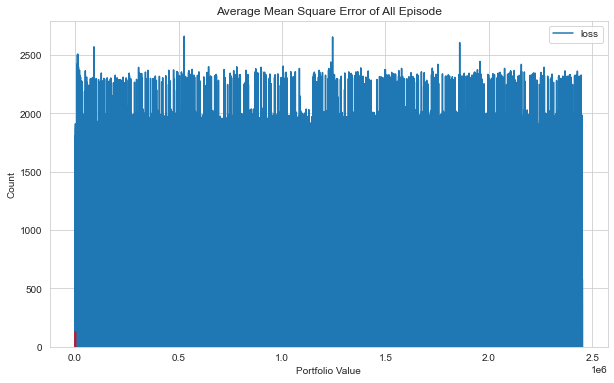

In [5]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

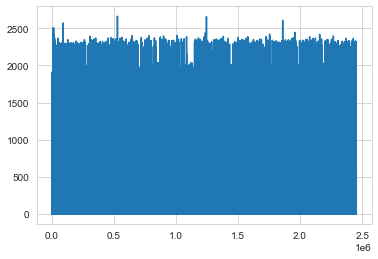

In [6]:
plt.plot(agent.model.losses)

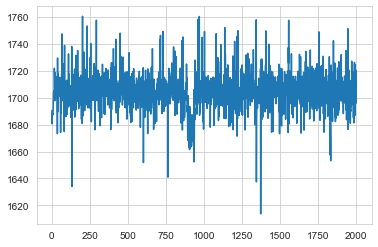

In [7]:
plt.plot(portfolio_value)

episode end value: 1548.71, duration: 0:00:00.097021
Sell: 417 times, Buy: 334 times


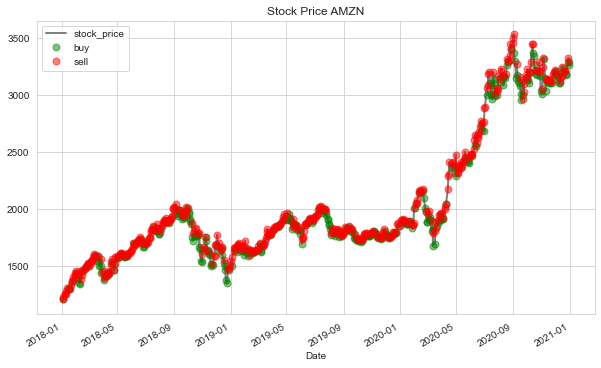

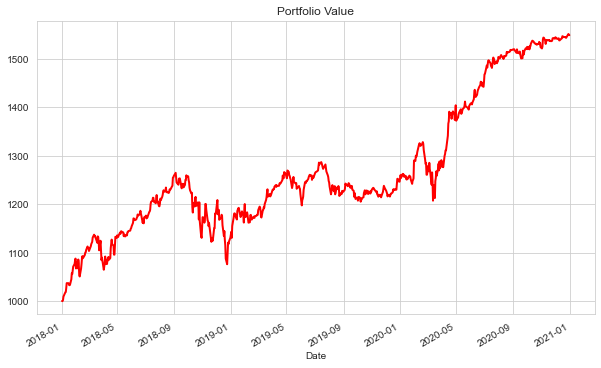

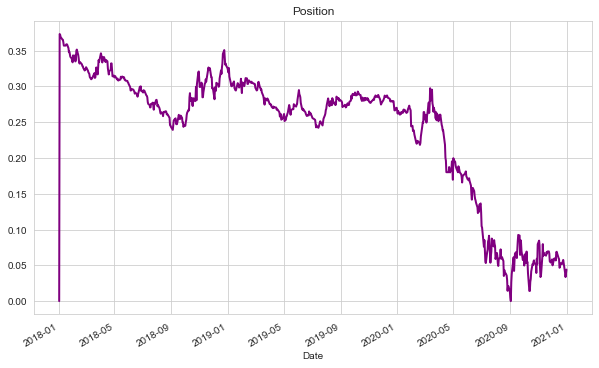

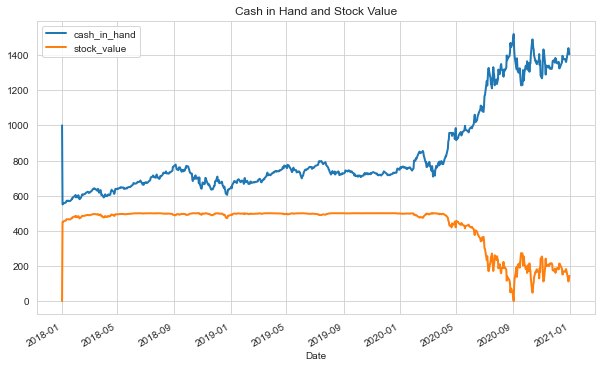

In [18]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [19]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: AMZN
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 15.70 %
Volatility: 0.1225
shape ratio: 1.1915
Maximun drawdown: -14.92 %
Calmar ratio: 1.0524
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 39.92 %
Volatility (benchmark): 0.3321
shape ratio: 1.1688
Maximun drawdown: -34.10 %
Calmar ratio (benchmark): 1.1705


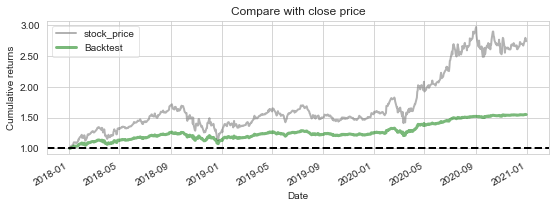

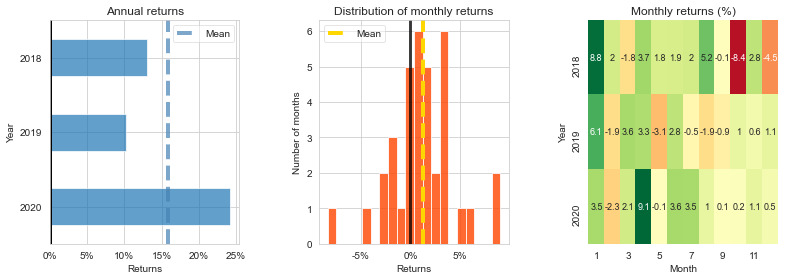

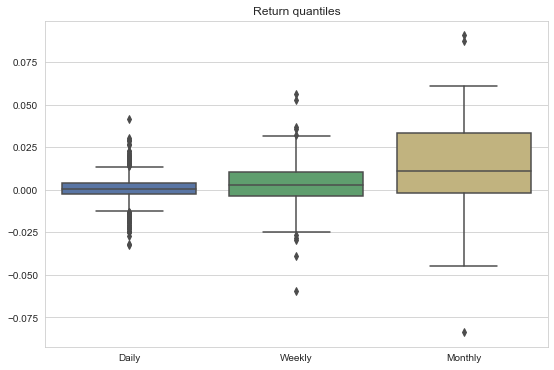

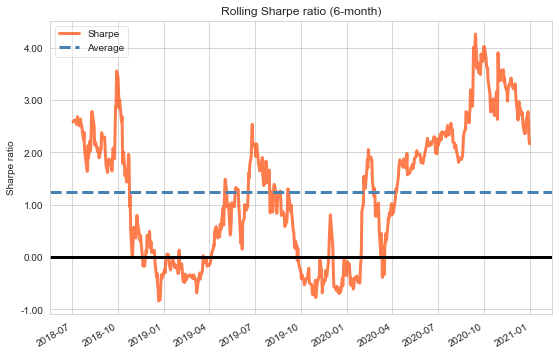

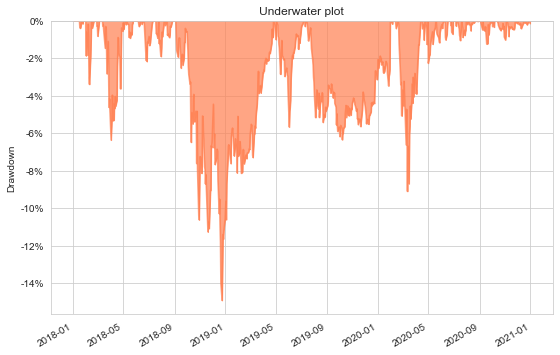

In [20]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')